# Business Case: Netflix - Data Exploration and Visualisation

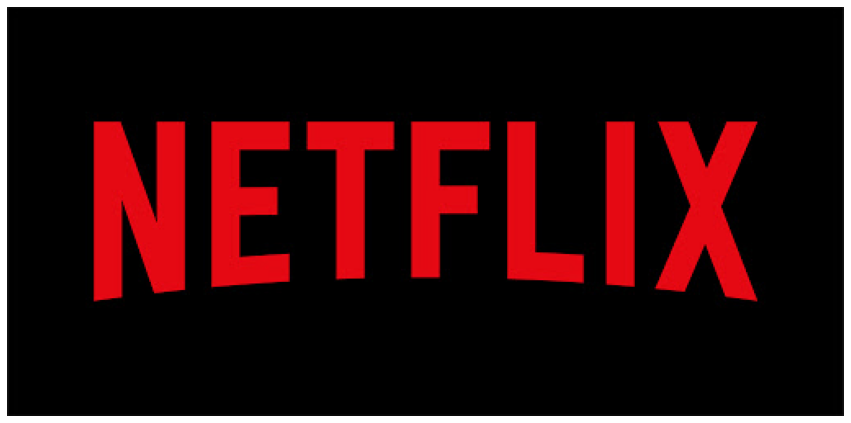

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
from numpy import NAN, NaN, nan
plt.figure(figsize=(15,15))
plt.axis('off')
img = plt.imread('data/Netflix_img.jpg')
plt.imshow(img)
plt.show()

**Business Problem**:To analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce more and to show relevant content to audience and attract more audience and content creators in order to grow the business.

**Dataset**
Link: d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

- **Show_id**: Unique ID for every Movie / Tv Show
- **Type**: Identifier - A Movie or TV Show
- **Title**: Title of the Movie / Tv Show
- **Director**: Director of the Movie
- **Cast**: Actors involved in the movie/show
- **Country**: Country where the movie/show was produced
- **Date_added**: Date it was added on Netflix
- **Release_year**: Actual Release year of the movie/show
- **Rating**: TV Rating of the movie/show
- **Duration**: Total Duration - in minutes or number of seasons
- **Listed_in**: Genre
- **Description**: The summary description

In [167]:
nf = pd.read_csv('data/netflix.csv')
nf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [168]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [470]:
nf.shape

(8807, 14)

In [169]:
nf.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [471]:
nf.describe(include = 'object').T

,count,unique,top,freq
show_id,8807,8807,s5109,1
type,8807,2,Movie,6131
title,8807,8807,Warrior Nun,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [170]:
nf.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [171]:
max_rows = 20
pd.set_option("display.max_rows", max_rows)

In [172]:
nf.size

105684

In [173]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [174]:
nf.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

(8807, 12)

In [176]:
nf[nf.duplicated()]  # No repeated rows.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [473]:
nf['type'].value_counts(normalize = True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [ ]:
nf['type'].value_counts(normalize = True)*100

In [477]:
constraint = nf['cast'].apply(lambda x:str(x).split(',')).to_list()

In [500]:
df_new = pd.DataFrame(constraint,index = nf['title'])

In [501]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [496]:
df_new = df_new.stack()

In [497]:
df_new = pd.DataFrame(df_new)
df_new

0
title                                         
Dick Johnson Is Dead 0                     nan
Blood & Water        0              Ama Qamata
                     1             Khosi Ngema
                     2           Gail Mabalane
                     3          Thabang Molaba
...                                        ...
Zubaan               3        Manish Chaudhary
                     4            Meghna Malik
                     5           Malkeet Rauni
                     6          Anita Shabdish
                     7   Chittaranjan Tripathy

[64951 rows x 1 columns]

In [498]:
df_new.reset_index(inplace = True)

In [499]:
df_new

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [491]:
df_new.columns = ['title','cast']
df_new

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

# Showing the null values with heatmap

In [472]:
nf.isnull().sum()/len(nf) *100

show_id             0.000000
type                0.000000
title               0.000000
director           29.908028
cast                9.367549
country             9.435676
date_added          0.113546
release_year        0.000000
rating              0.045418
duration            0.034064
listed_in           0.000000
description         0.000000
date_time_added     0.113546
Year                0.113546
dtype: float64

In [178]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Heatmap

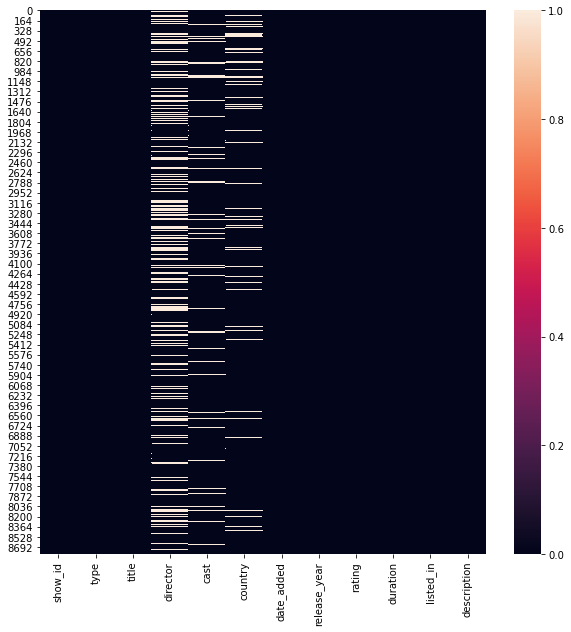

In [179]:
plt.figure(figsize=(10,10))
sns.heatmap(nf.isnull())
plt.show()


**Conclusion** : From above heat map, we can conclude thatonly director, cast and country has significant amount of null values in which director's null values are highest.

# New column for datetime created

In [180]:
nf['date_time_added'] = pd.to_datetime(nf['date_added'])

nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24


# No. of movies / tv shows date-added in which years

In [181]:
nf['date_time_added'].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_time_added, dtype: int64

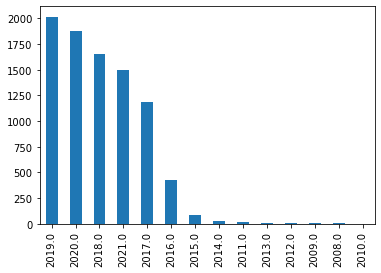

In [321]:
nf['date_time_added'].dt.year.value_counts().plot(kind = 'bar')
plt.show()

**Conclusion** : From above plot, we can conclude the order of release of the movies/tv shows, where maximumn no. of movies/tv shows are added in year 2019

# No. of movies / tv shows released in which years

In [183]:
nf['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64

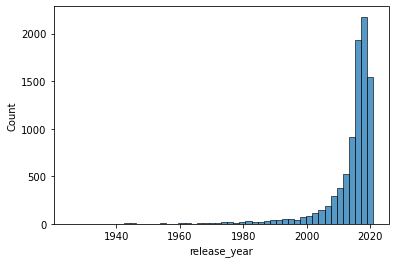

In [309]:
sns.histplot(data = nf, x = 'release_year', bins = 50)
plt.show()

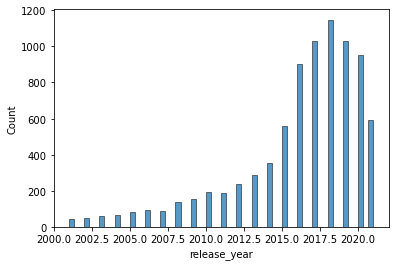

In [328]:
# plt.figure(figsize=(7,7))
nf_rel_yr_2000 = nf.loc[nf['release_year'] > 2000 , ['release_year','type']]
sns.histplot(data = nf_rel_yr_2000, x = 'release_year', bins = 60)
plt.show()


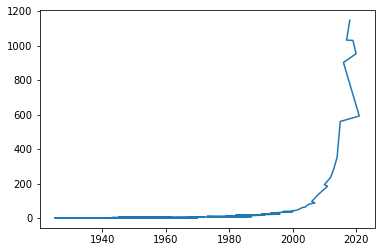

In [263]:
nf['release_year'].value_counts().plot(kind = 'line')
plt.show()

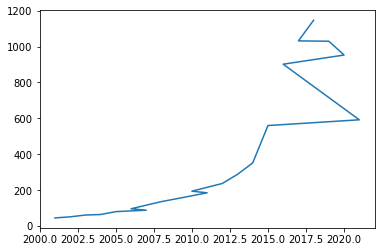

In [264]:
# plt.figure(figsize=(15,10))
nf.loc[nf['release_year'] > 2000 , 'release_year'].value_counts().plot(kind = 'line')
plt.show()

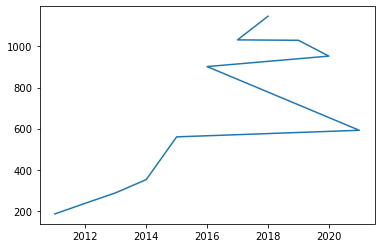

In [265]:
nf.loc[nf['release_year'] > 2010 , 'release_year'].value_counts().plot(kind = 'line')
plt.show()

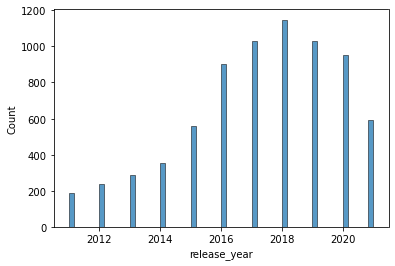

In [327]:
nf_rel_yr_2010 = nf.loc[nf['release_year'] > 2010 , ['release_year','type']]
sns.histplot(data = nf_rel_yr_2010, x = 'release_year', bins = 60)
plt.show()

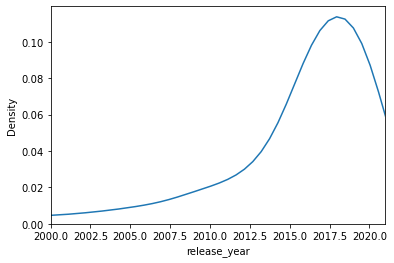

In [400]:
sns.kdeplot(nf['release_year'])
plt.xlim(2000,2021)
plt.show()

**Conclusion** : From above barplot, histplot,kdeplot and lineplot for univariate data, we can conclude that, the movies which have relased dates starts right from 1925(nf.describe().min()) and has an increasing trend till 2018 (which had maximum no. of movies/tv shows released) after which the movies/tv shows saw a drop till 2021.

# No. of Movies and TV shows

In [187]:
nf.groupby('type').type.count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

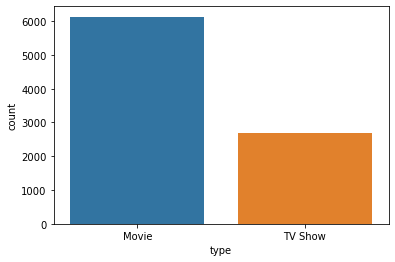

In [188]:
sns.countplot(x = 'type', data =nf)
plt.show()

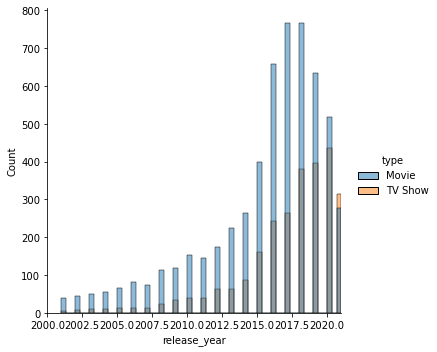

In [342]:
sns.displot(data = nf_rel_yr_2000, x = 'release_year', bins = 60, hue = 'type')
plt.xlim(2000,2021)
plt.show()

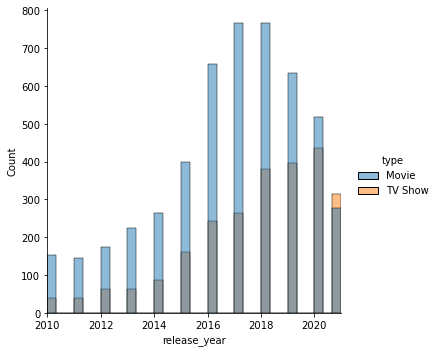

In [341]:
# plt.figure(figsize=(25,25))
sns.displot(data = nf_rel_yr_2000, x = 'release_year', bins = 60, hue = 'type')
plt.xlim(2010,2021)
plt.show()

**Conclusion** : From above countplot and distplot we can conclude that there are more number of movies produced as compared to tv shows excep in year 2021 where tv shows outnumbered the no. of movies.

# Country specific EDA

In [266]:
nf['country'].value_counts(dropna = False)

United States                                  2818
India                                           972
NaN                                             831
United Kingdom                                  419
Japan                                           245
                                               ... 
United States, Switzerland                        1
France, Canada, Italy, United States, China       1
Namibia                                           1
United States, Canada, Japan, Panama              1
Canada, Germany, South Africa                     1
Name: country, Length: 749, dtype: int64

In [305]:
nf['country'].dropna()

0                                           United States
1                                            South Africa
4                                                   India
7       United States, Ghana, Burkina Faso, United Kin...
8                                          United Kingdom
                              ...                        
8801                         United Arab Emirates, Jordan
8802                                        United States
8804                                        United States
8805                                        United States
8806                                                India
Name: country, Length: 7976, dtype: object

In [272]:
df = nf['country'].str.split(',',expand=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [304]:
df = nf['country'].str.split(',',expand=True)
df.nunique()

0     86
1     93
2     60
3     49
4     23
5     15
6      6
7      4
8      2
9      2
10     1
11     1
dtype: int64

In [364]:
# country_list = []
country_set_fin = set()
for i in range(12):
    list1 = df.loc[:,i].dropna().to_list()
    list2 = []
    for i in list1:
        list2.append(i.strip())
    country_set = set(list2)
    for i in country_set:
        country_set_fin.add(i)        
country_list = list(country_set_fin)
country_list_fin = country_list[1:]
print(country_list_fin,end = ' ')        

['Dominican Republic', 'China', 'Austria', 'Hong Kong', 'Uganda', 'Mauritius', 'Ireland', 'Norway', 'United States', 'Netherlands', 'Peru', 'Cambodia', 'Lithuania', 'Russia', 'Italy', 'Saudi Arabia', 'Mexico', 'Latvia', 'Turkey', 'Mongolia', 'Taiwan', 'Slovenia', 'Belgium', 'Bermuda', 'Croatia', 'Romania', 'Spain', 'Guatemala', 'South Africa', 'New Zealand', 'Philippines', 'Zimbabwe', 'Azerbaijan', 'Argentina', 'Portugal', 'Malaysia', 'Mozambique', 'East Germany', 'Algeria', 'Nicaragua', 'Malta', 'France', 'Canada', 'Jordan', 'Czech Republic', 'Luxembourg', 'United Kingdom', 'Morocco', 'Burkina Faso', 'West Germany', 'Chile', 'Paraguay', 'Liechtenstein', 'Senegal', 'Jamaica', 'Iran', 'Sri Lanka', 'Angola', 'Ecuador', 'Namibia', 'Venezuela', 'Serbia', 'Afghanistan', 'Palestine', 'Iceland', 'Finland', 'Ethiopia', 'Armenia', 'Switzerland', 'Nigeria', 'Cayman Islands', 'Greece', 'Ghana', 'Botswana', 'Soviet Union', 'Australia', 'Cyprus', 'Samoa', 'Montenegro', 'United Arab Emirates', 'Colo

In [362]:
len(country_list_fin)

122

In [383]:
country_list = []

for i in range(12):
    list1 = df.loc[:,i].dropna().to_list()
    list2 = []
    for i in list1:
        list2.append(i.strip())
    for i in list2:
        country_list.append(i)
country_list = filter(None, country_list) # Handling / Filtering of  None/Empty values from the list which frequency was 6


In [381]:
max_rows = 130
pd.set_option("display.max_rows", max_rows)

In [384]:
country_list_series = pd.Series(country_list).value_counts()

In [424]:
top_10 = country_list_series.head(10)
top_10

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64

In [395]:
# country_list_series.tail(38)

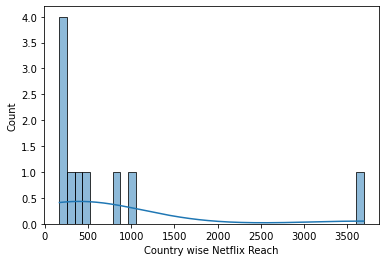

In [464]:
sns.histplot(top_10,bins = 40,kde = True)
plt.xlabel('Country wise Netflix Reach')
plt.show()

**Conclusion 1** : For the EDA on country sepcidic data, as we can see that more than one countries are given in the country column, I have converted them into a single list of unique countries, from which we can conclude than there ate 122 unique countries in the dataset 

**Conclusion 2** :
- Previously 831 countries had NaN as the entry field for country. Which is 3rd largest after US and India. I removed them and after converting the messy country data into a series of unique countries with Netflix's movie's or tv shows being watched. 
- **country_list_series.head(10)** contains the value counts of top 10 countries having reach of Netflix.
-**country_list_series.tail(38)** contains 38 countries where Netflix has only 1 reach. Netflix should focus on relevant content for these downtrodden countries so that it's reach will increase

In [ ]:
# Astonishingly high no. i.e 2634 NaN fields are there for directors.

In [425]:
director = nf['director'].value_counts(dropna = False)
director

NaN                       2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
                          ... 
Chris Foggin                 1
Owen Egerton                 1
Kathryn Fasegha              1
Mads Matthiesen              1
Manjari Makijany             1
Name: director, Length: 4529, dtype: int64

In [426]:
typedf = nf['type'].nunique(dropna=False)
typedf

2

In [427]:
listed_in_df = nf['listed_in'].nunique(dropna=False)
listed_in_df

514

In [429]:
listed_in_df = nf['listed_in'].unique()
listed_in_df

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [452]:
df_show_types = nf['listed_in'].str.split(',',expand=True)
df_show_types

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries
2,Crime TV Shows,International TV Shows,TV Action & Adventure
3,Docuseries,Reality TV,None
4,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
8802,Cult Movies,Dramas,Thrillers
8803,Kids' TV,Korean TV Shows,TV Comedies
8804,Comedies,Horror Movies,None
8805,Children & Family Movies,Comedies,None


In [456]:
show_types = []

for i in range(3):
    list1 = df_show_types.loc[:,i].dropna().to_list()
    list2 = []
    for i in list1:
        list2.append(i.strip().lower())
    for i in list2:
        show_types.append(i)
# show_types = filter(None, show_types)
# show_types        

In [468]:
show_types_Series = pd.Series(show_types).value_counts()
show_types_Series.columns = ['show_types','frequency']
show_types_Series.columns 

['show_types', 'frequency']

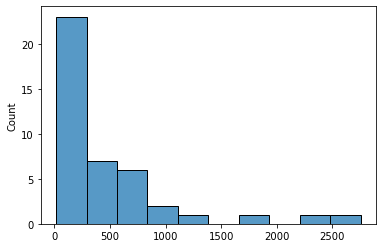

In [461]:
sns.histplot(show_types_Series)
plt.show()

In [430]:
rat=nf['rating'].nunique(dropna=False)
rat

18

In [432]:
rat1=nf['rating']
rat1.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

# As the rating includes the age bars and not the ratings of a particular movie or tv show, we can't conclude anything with such data hence moving on to more evident column i.e duration

In [ ]:
direc = nf.loc[:,['director','cast','country','duration']]

In [ ]:
direc.head()

In [ ]:
# arr1 = np.array(direc.duration.unique())
# arr1

# TV Shows EDA

In [ ]:
tv = nf.loc[nf.type == 'TV Show']
tv.head()

In [ ]:
tv.shape

# Out of 2676 TV shows, 883 shows have duration more than 1 Season which means, the first season was a hit and liked by audience hence it's beneficial to go for next season.

In [ ]:
hit_tv1 = tv.loc[tv['duration'].apply(lambda x: int(x.split(" ")[0]))>1]
hit_tv1.head(2)

In [ ]:
hit_tv1.shape

In [197]:
hit_tv1.title

1                       Blood & Water
4                        Kota Factory
8       The Great British Baking Show
15                  Dear White People
17                    Falsa identidad
                    ...              
8755                Women Behind Bars
8795                  Yu-Gi-Oh! Arc-V
8796                       Yunus Emre
8797                        Zak Storm
8803                      Zombie Dumb
Name: title, Length: 883, dtype: object

In [198]:
# max_rows = 10
# pd.set_option("display.max_rows", max_rows)

# More than 5 seasons


In [200]:
hit_tv2 = tv.loc[tv['duration'].apply(lambda x: int(x.split(" ")[0]))>5]
hit_tv2.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24
55,s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,"September 15, 2021",2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...,2021-09-15


# Total 100 similar tv shows can be recommended for more focus w.r.t production

In [201]:
hit_tv2.shape

(99, 13)

In [202]:
hit_tv2 = hit_tv2.sort_values(by = 'release_year',ascending=False,ignore_index=True)
hit_tv3 = hit_tv2.loc[:,['title','release_year','duration','country']]
hit_tv3
# hit_tv2[['title','release_year','duration','country']]

,title,release_year,duration,country
0,The Great British Baking Show,2021,9 Seasons,United Kingdom
1,Numberblocks,2021,6 Seasons,United Kingdom
2,Nailed It,2021,6 Seasons,United States
3,Lucifer,2021,6 Seasons,United States
4,Grace and Frankie,2021,7 Seasons,United States
...,...,...,...,...
94,Cheers,1992,11 Seasons,United States
95,Danger Mouse: Classic Collection,1992,10 Seasons,United Kingdom
96,Saint Seiya,1986,6 Seasons,Japan
97,Dad's Army,1977,10 Seasons,United Kingdom


# Sorting w.r.t year and most seasons

In [203]:


# hit_tv3[['Num','Seasons']] = hit_tv3['duration'].apply(lambda x: int(x.split(" ")))
# hit_tv3

In [204]:
hit_tv3[['Num','Seasons']] = hit_tv3['duration'].str.split(" ",expand = True)
hit_tv3['Num'] = hit_tv3['Num'].astype(int)
hit_tv3

,title,release_year,duration,country,Num,Seasons
0,The Great British Baking Show,2021,9 Seasons,United Kingdom,9,Seasons
1,Numberblocks,2021,6 Seasons,United Kingdom,6,Seasons
2,Nailed It,2021,6 Seasons,United States,6,Seasons
3,Lucifer,2021,6 Seasons,United States,6,Seasons
4,Grace and Frankie,2021,7 Seasons,United States,7,Seasons
...,...,...,...,...,...,...
94,Cheers,1992,11 Seasons,United States,11,Seasons
95,Danger Mouse: Classic Collection,1992,10 Seasons,United Kingdom,10,Seasons
96,Saint Seiya,1986,6 Seasons,Japan,6,Seasons
97,Dad's Army,1977,10 Seasons,United Kingdom,10,Seasons


In [205]:
hit_tv4 = hit_tv3.sort_values(by = 'Num',ascending=False,ignore_index=True)
hit_tv4.head(5)


,title,release_year,duration,country,Num,Seasons
0,Grey's Anatomy,2020,17 Seasons,United States,17,Seasons
1,NCIS,2017,15 Seasons,United States,15,Seasons
2,Supernatural,2019,15 Seasons,"United States, Canada",15,Seasons
3,COMEDIANS of the world,2019,13 Seasons,United States,13,Seasons
4,Red vs. Blue,2015,13 Seasons,United States,13,Seasons


In [206]:
hit_tv4.tail(5)

,title,release_year,duration,country,Num,Seasons
94,Terrace House: Opening New Doors,2018,6 Seasons,Japan,6,Seasons
95,Gossip Girl,2012,6 Seasons,United States,6,Seasons
96,BoJack Horseman,2020,6 Seasons,United States,6,Seasons
97,Private Practice,2012,6 Seasons,United States,6,Seasons
98,Longmire,2017,6 Seasons,United States,6,Seasons


In [207]:
title_array = hit_tv2['title'].to_list()
# title_array

# Movies EDA

In [208]:
mov = nf.loc[nf.type == 'Movie']
mov.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23


<AxesSubplot:xlabel='release_year'>

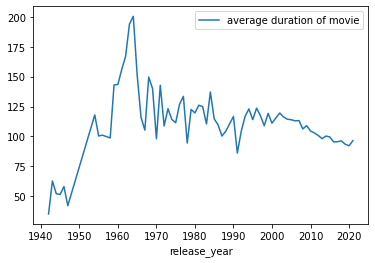

In [209]:
mov_dur = mov.loc[:,['duration','release_year']]
mov_dur = mov_dur.dropna()
mov_dur[['average duration of movie']] = mov_dur['duration'].str.split(" ",expand = True)[0]
mov_dur['average duration of movie'] = mov_dur['average duration of movie'].astype(int)
mov_dur.groupby('release_year').mean().plot(kind = 'line')

# Movies before 2000 and they are still watched and enjoyed by audience which means, Netflix should add content similar to these movies.

In [210]:
mov1 = mov.loc[mov['release_year'] < 2000]
mov1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,2021-09-21
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",NaN,"September 21, 2021",1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...,2021-09-21
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,2021-09-16


In [211]:
mov1.shape

(476, 13)

# Top 10 directors - directing more no. of movies

In [212]:
nf['director'].value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

# Country with highest no. of movies and TV shows respectively

In [213]:
tv['country'].value_counts().head(10)

United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          48
Name: country, dtype: int64

In [214]:
mov['country'].value_counts().head(10)

United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: country, dtype: int64

<ipython-input-448-e603029187ca>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nf_India1 = nf[top_10 == 'India']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

# EDA w.r.t more focus on INDIA

In [215]:
nf_India = nf[nf['country'] == 'India']
nf_India.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21


#  Conc: Total 79 tv shows from India

In [216]:
nf_India_tv = nf.loc[(nf['type'] == 'TV Show') & (nf['country'] == 'India')]
nf_India_tv.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",2021-09-16


In [217]:
nf_India_tv.shape

(79, 13)

# Conc: Total 893 movies from India

In [218]:
nf_India_movie = nf.loc[(nf['type'] == 'Movie') & (nf['country'] == 'India')]
nf_India_movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21
105,s106,Movie,Angamaly Diaries,Lijo Jose Pellissery,"Antony Varghese, Reshma Rajan, Binny Rinky Ben...",India,"September 5, 2021",2017,TV-14,128 min,"Action & Adventure, Comedies, Dramas",After growing up amidst the gang wars of his h...,2021-09-05


In [219]:
nf_India_movie.shape

(893, 13)

# Top 10 directors -India

In [220]:
nf_India['director'].value_counts().head(10)

David Dhawan          9
Ram Gopal Varma       7
Rajkumar Santoshi     6
Sooraj R. Barjatya    6
Anees Bazmee          6
Imtiaz Ali            6
Madhur Bhandarkar     5
Indra Kumar           5
Mahesh Manjrekar      5
Rajiv Mehra           5
Name: director, dtype: int64

- nf_India_movie
- nf_India_tv

In [222]:
nf_India_tv2 = nf_India_tv.sort_values(by = 'release_year',ascending=False,ignore_index=True)
nf_India_tv3 = nf_India_tv2.loc[:,['title','release_year','duration','country']]
nf_India_tv3[['Num']] = nf_India_tv3['duration'].str.split(" ",expand = True)[0]
nf_India_tv3['Num'] = nf_India_tv3['Num'].astype(int)
# nf_India_tv3
nf_India_tv4 = nf_India_tv3.sort_values(by = 'Num',ascending=False,ignore_index=True)
nf_India_tv4.head(20)

,title,release_year,duration,country,Num
0,Little Things,2019,3 Seasons,India,3
1,The House That Made Me,2015,3 Seasons,India,3
2,Pyaar Tune Kya Kiya,2014,3 Seasons,India,3
3,Chhota Bheem,2021,3 Seasons,India,3
4,Kota Factory,2021,2 Seasons,India,2
5,Little Singham,2020,2 Seasons,India,2
6,Sab Jholmaal Hai,2017,2 Seasons,India,2
7,Regiment Diaries,2020,2 Seasons,India,2
8,The Big Day,2021,2 Seasons,India,2
9,Girls Hostel,2018,1 Season,India,1


In [223]:
nf_India_movie2 = nf_India_movie.sort_values(by = 'release_year',ascending=False,ignore_index=True)
nf_India_movie3 = nf_India_movie2.loc[:,['title','release_year','duration','country']]
nf_India_movie3[['Num']] = nf_India_movie3['duration'].str.split(" ",expand = True)[0]
nf_India_tv3['Num'] = nf_India_tv3['Num'].astype(int)
# nf_India_tv3
nf_India_tv4 = nf_India_tv3.sort_values(by = 'Num',ascending=False,ignore_index=True)
nf_India_tv4.head(20)

,title,release_year,duration,country,Num
0,Little Things,2019,3 Seasons,India,3
1,The House That Made Me,2015,3 Seasons,India,3
2,Pyaar Tune Kya Kiya,2014,3 Seasons,India,3
3,Chhota Bheem,2021,3 Seasons,India,3
4,Kota Factory,2021,2 Seasons,India,2
5,Little Singham,2020,2 Seasons,India,2
6,Sab Jholmaal Hai,2017,2 Seasons,India,2
7,Regiment Diaries,2020,2 Seasons,India,2
8,The Big Day,2021,2 Seasons,India,2
9,Girls Hostel,2018,1 Season,India,1


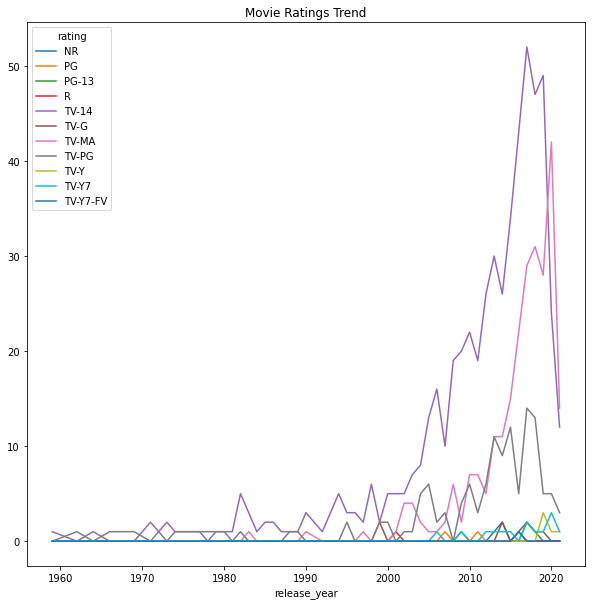

In [447]:
pd.crosstab(nf_India['release_year'] ,nf_India['rating']).plot(kind= 'line',figsize = (10,10),title = 'Movie Ratings Trend')
plt.show()

# Visualization

In [225]:
rel_yr = nf['release_year'].dropna()
rel_yr_arr = rel_yr.to_list()
x = rel_yr_arr
len(x)
type(x[0])
rel_yr.shape

(8807,)

In [226]:
# x = rel_yr
# type(x)
# nf['date_added'] = pd.to_datetime(nf['date_added'])
# dt_add = nf['date_added'].dt.year
# type(dt_add)
# # dt_add_arr = dt_add.to_list()
# dt_add = nf['date_added'].apply(lambda x :int(x))
# dt_add

In [227]:
len(nf['date_added'].unique())

1768

In [228]:
nf['date_added'].nunique()

1767

In [229]:
nf['date_added'].nunique(dropna = False)

1768

In [230]:
# dt_add__f = nf['date_added'].iloc[1]
# type(dt_add__f)
# nf['date_added'].isnull().values.any()
# nf.isnull().values.any()
# nf['date_added'].isnull()
# new_date_df = nf['date_added'].dropna()
# new_date_df ---#Length: 8797

In [231]:
demo1 =nf['date_added'].value_counts(dropna = False)
demo1.shape

(1768,)

In [232]:
nf['Year'] = nf['date_time_added'].dt.year
nf.head(2)
# nf.columns

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_time_added,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0


In [233]:
dt_add_year = pd.Series(nf['date_time_added'] .dropna()).apply(lambda x: int(x.strftime("%Y")))

In [234]:
dt_add_year_arr = dt_add_year.to_list()
# type(dt_add_arr[0])
y = dt_add_arr

NameError: name 'dt_add_arr' is not defined

In [ ]:

rel_yr.shape


In [235]:
dt_add.shape

NameError: name 'dt_add' is not defined

In [236]:
# plt.plot(x,y)
# plt.show()   ----#ValueError: x and y must have same first dimension, but have shapes (8807,) and (8797,)

# Continuous variable(s): Distplot, countplot, histogram for univariate analysis



# Categorical variable(s): Boxplot

In [244]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          8807 non-null   object        
 1   type             8807 non-null   object        
 2   title            8807 non-null   object        
 3   director         6173 non-null   object        
 4   cast             7982 non-null   object        
 5   country          7976 non-null   object        
 6   date_added       8797 non-null   object        
 7   release_year     8807 non-null   int64         
 8   rating           8803 non-null   object        
 9   duration         8804 non-null   object        
 10  listed_in        8807 non-null   object        
 11  description      8807 non-null   object        
 12  date_time_added  8797 non-null   datetime64[ns]
 13  Year             8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(

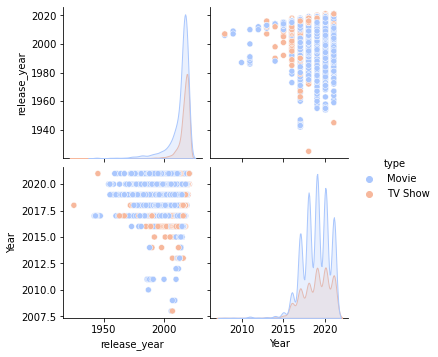

In [238]:
sns.pairplot(nf,hue='type',palette = 'coolwarm')

C:\Users\s.sunil.udgirkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='release_year'>

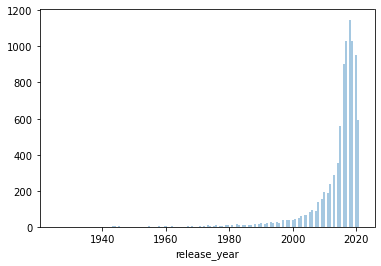

In [239]:
sns.distplot(nf['release_year'],bins=150,kde = False)

<AxesSubplot:xlabel='release_year'>

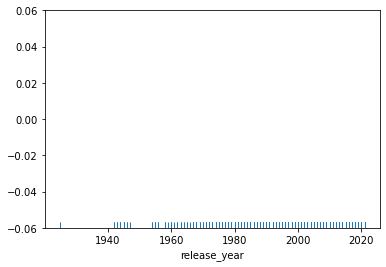

In [240]:
sns.rugplot(nf['release_year'])

<AxesSubplot:xlabel='release_year', ylabel='Density'>

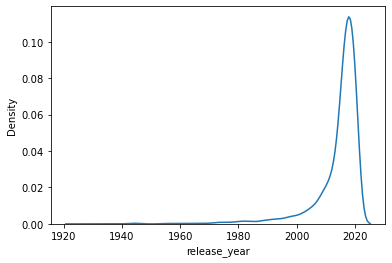

In [241]:
sns.kdeplot(nf['release_year'])

<AxesSubplot:xlabel='type', ylabel='release_year'>

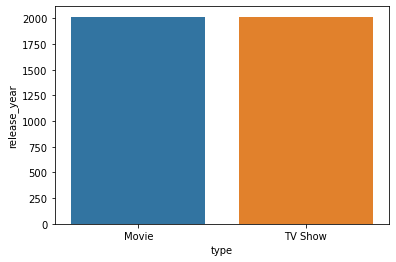

In [242]:
sns.barplot(x = 'type', y = 'release_year', data =nf)

<AxesSubplot:xlabel='type', ylabel='count'>

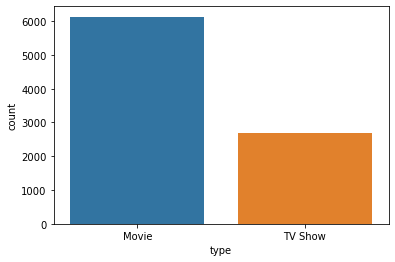

In [243]:
sns.countplot(x = 'type', data =nf)